In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/Users/armeniphone/Desktop/Ironhack/technical_challenge_DA/data/measurements.csv")
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [3]:
def clean_df(df):
    n_cols = []
    for i in range(len(df.columns)):
        n_cols.append(df.columns[i].lower().replace(' ','_'))
    df.columns = n_cols
    
    lst = ['distance','consume','temp_inside']
    for col in lst:
        df[col] = df[col].str.replace(',', '.').astype(float)
    return df

In [4]:
clean_df(data)
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [5]:
data.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters     object
refill_gas        object
dtype: object

In [6]:
data2 = pd.read_excel("/Users/armeniphone/Desktop/Ironhack/technical_challenge_DA/data/measurements2.xlsx")

In [7]:
data2.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

In [8]:
data.merge(data2, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas,AC,refill liters,refill gas


In [9]:
data.isna().sum()/len(data)*100

distance          0.000000
consume           0.000000
speed             0.000000
temp_inside       3.092784
temp_outside      0.000000
specials         76.030928
gas_type          0.000000
ac                0.000000
rain              0.000000
sun               0.000000
refill_liters    96.649485
refill_gas       96.649485
dtype: float64

In [10]:
cols_to_drop = ['refill_liters', 'refill_gas']

In [11]:
data['specials'].value_counts(dropna=False)

specials
NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: count, dtype: int64

In [12]:
cols_to_drop.append('specials')
cols_to_drop

['refill_liters', 'refill_gas', 'specials']

In [13]:
data = data.drop(cols_to_drop, axis=1)
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


In [14]:
mode = data['temp_inside'].mode()
mode

0    21.5
Name: temp_inside, dtype: float64

In [15]:
data.temp_inside.fillna(mode[0], inplace=True)

In [16]:
data.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
ac              0
rain            0
sun             0
dtype: int64

In [17]:
data['temp_diff'] = data.temp_inside - data.temp_outside

In [18]:
data['fuel_used'] = data.distance * data.consume/100
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,temp_diff,fuel_used
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,6.5,0.5920
384,16.1,4.3,38,25.0,31,SP98,1,0,0,-6.0,0.6923
385,16.0,3.8,45,25.0,19,SP98,0,0,0,6.0,0.6080
386,15.4,4.6,42,25.0,31,SP98,1,0,0,-6.0,0.7084


In [19]:
data['cost_of_trip'] = np.where(data.gas_type == 'E10',data.fuel_used*2.045,data.fuel_used*2.152).round()

In [20]:
data


,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,temp_diff,fuel_used,cost_of_trip
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000,3.0
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040,1.0
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160,1.0
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031,1.0
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,6.5,0.5920,1.0
384,16.1,4.3,38,25.0,31,SP98,1,0,0,-6.0,0.6923,1.0
385,16.0,3.8,45,25.0,19,SP98,0,0,0,6.0,0.6080,1.0
386,15.4,4.6,42,25.0,31,SP98,1,0,0,-6.0,0.7084,2.0


**Converting speed to decimal of an hour**

In [21]:
data['trip_in_hours'] = data.speed/60

In [22]:
data['avg_speed'] = data['distance']/data['trip_in_hours']

In [23]:
data = data.drop(['speed'], axis = 1)

In [24]:
data.dtypes
data_num = data.select_dtypes(np.number)
data_cat= data.select_dtypes(object)

In [25]:
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.300000,11.800000,14.6000,19.000000,216.1000
consume,388.0,4.912371,1.033172,3.300000,4.300000,4.7000,5.300000,12.2000
temp_inside,388.0,21.916237,0.997449,19.000000,21.500000,22.0000,22.500000,25.5000
temp_outside,388.0,11.358247,6.991542,-5.000000,7.000000,10.0000,16.000000,31.0000
ac,388.0,0.077320,0.267443,0.000000,0.000000,0.0000,0.000000,1.0000
rain,388.0,0.123711,0.329677,0.000000,0.000000,0.0000,0.000000,1.0000
sun,388.0,0.082474,0.275441,0.000000,0.000000,0.0000,0.000000,1.0000
temp_diff,388.0,10.557990,6.700099,-8.000000,6.375000,11.5000,14.625000,26.0000
fuel_used,388.0,0.935294,1.115967,0.120000,0.551650,0.6806,0.916500,11.4533
cost_of_trip,388.0,1.932990,2.393066,0.000000,1.000000,1.0000,2.000000,25.0000


In [26]:
data.to_csv('cobify_clean_data.csv', index= False)

**All cleaning and feature adding completed**

**Looking at some visualisations**

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

NameError: name 'fig' is not defined

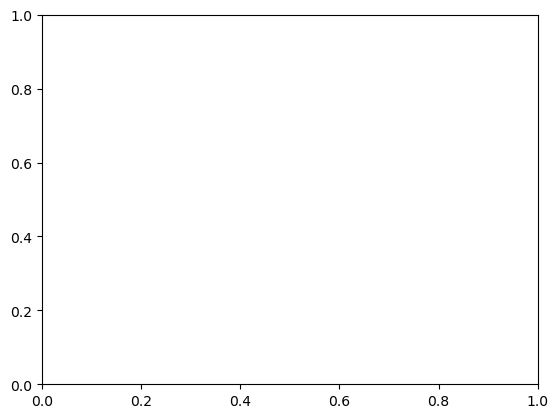

In [28]:
fig.ax = plt.subplots()
sns.countplot(x=data.gas_type)
plt.show()

In [35]:
for column in data_num:
    sns.displot(data_num(column))
    plt.show()

TypeError: 'DataFrame' object is not callable

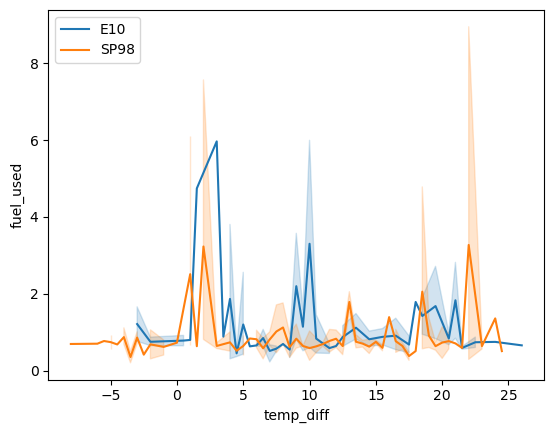

In [34]:
fig,ax = plt.subplots()
cole10 = data[data.gas_type=='E10']
col98 = data[data.gas_type=='SP98']

ax1 = sns.lineplot(data=cole10, x=cole10["temp_diff"], y=cole10["fuel_used"], label = 'E10')
ax2 = sns.lineplot(data=col98, x=col98["temp_diff"], y=col98["fuel_used"], label = 'SP98')
plt.legend(loc="upper left")
plt.show()

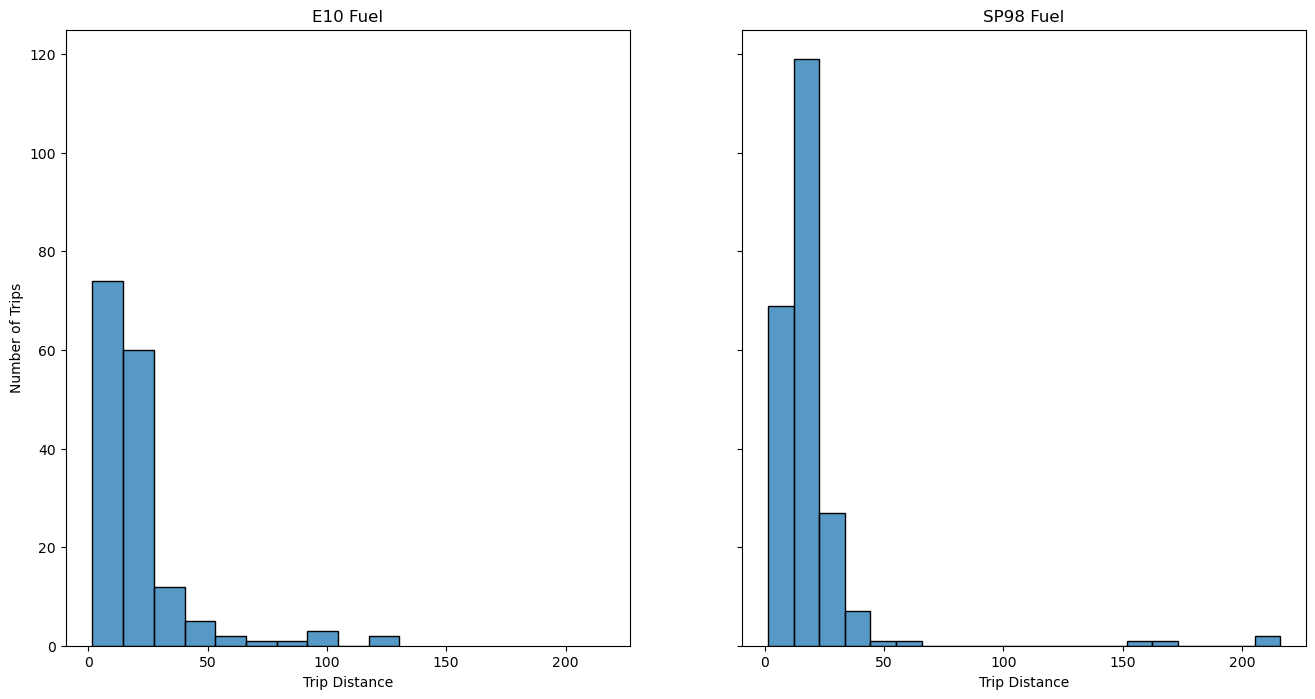

In [33]:
fig,axes = plt.subplots(1,2, figsize=(16,8), sharey=True, sharex=True)
cole10 = data[data.gas_type=='E10']
col98 = data[data.gas_type=='SP98']

sns.histplot(ax=axes[0], data=cole10, x=cole10["distance"], bins=10, label = 'E10').set(title='E10 Fuel')
axes[0].set(xlabel="Trip Distance", ylabel="Number of Trips")

sns.histplot(ax=axes[1], data=col98, x=col98["distance"], bins=20, label = 'SP98').set(title='SP98 Fuel')
axes[1].set(xlabel="Trip Distance", ylabel="Number of Trips")
plt.ylabel("Number of Trips")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

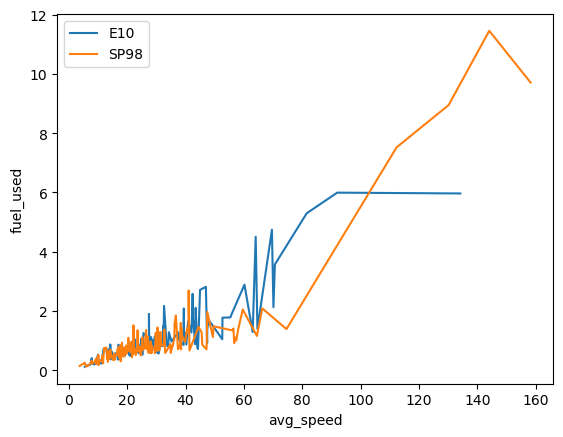

In [32]:
fig,ax = plt.subplots()
cole10 = data[data.gas_type=='E10']
col98 = data[data.gas_type=='SP98']

ax1 = sns.lineplot(data=cole10, x=cole10["avg_speed"], y=cole10["fuel_used"], label = 'E10')
ax2 = sns.lineplot(data=col98, x=col98["avg_speed"], y=col98["fuel_used"], label = 'SP98')
plt.legend(loc="upper left")
plt.show


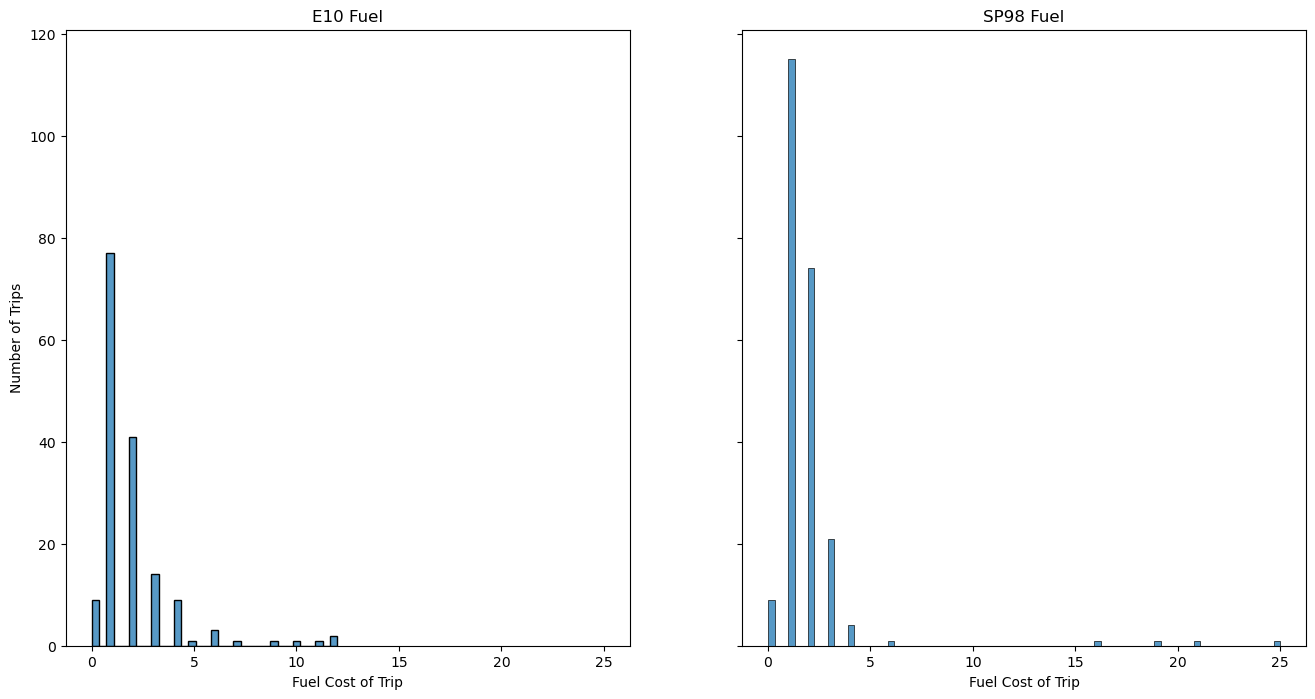

In [36]:
fig,axes = plt.subplots(1,2, figsize=(16,8), sharey=True, sharex=True)
cole10 = data[data.gas_type=='E10']
col98 = data[data.gas_type=='SP98']

sns.histplot(ax=axes[0], data=cole10, x=cole10["cost_of_trip"], label = 'E10').set(title='E10 Fuel')
axes[0].set(xlabel="Fuel Cost of Trip", ylabel="Number of Trips")

sns.histplot(ax=axes[1], data=col98, x=col98["cost_of_trip"], label = 'SP98').set(title='SP98 Fuel')
axes[1].set(xlabel="Fuel Cost of Trip", ylabel="Number of Trips")
plt.ylabel("Number of Trips")

plt.show()

In [37]:
display(data['cost_of_trip'].max())
display(data['cost_of_trip'].min())

25.0

0.0

**Conclusions and Insights**

**When looking at types of fuels used for the various trips, there are some suggestions I would make based on  the data.**

**--It appears that traveling at higher speeds, most likely on highways during longer trips, that the E10 fuel is more econimically sound. I would try to assign cars that use E10 wherever the average speed is most likely to be over 100kph**

**--There is not much difference between the fuel economy of either gas when used for short distances or quick trips.**

**--I would recommend trying to use E10 fuel as much as possible as it can be significantly cheaper throughout the Eu.**

**--In terms of fuel use in different temperatures, if the temp between the inside and outside is between 0 and 10 degrees it may be better to use the SP98 fuel. However if the difference is extreme, over 20 degree difference, it may be better to use E10 fuel.**

**--When choosing which car of the fleet to designate per trip, these conditions should be taken into consideration**